<a href="https://colab.research.google.com/github/saivarsha123/AIML-2025/blob/main/AIML_lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import fetch_openml

car_data = fetch_openml(name='car',version=2,parser='auto')

In [5]:
type(car_data)

sklearn.utils._bunch.Bunch

In [6]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [7]:
df=car_data.frame
df.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [8]:
df.shape

(1728, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   buying       1728 non-null   category
 1   maint        1728 non-null   category
 2   doors        1728 non-null   category
 3   persons      1728 non-null   category
 4   lug_boot     1728 non-null   category
 5   safety       1728 non-null   category
 6   binaryClass  1728 non-null   category
dtypes: category(7)
memory usage: 13.0 KB


In [11]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,2
top,high,high,2,2,big,high,P
freq,432,432,432,576,576,576,1210


In [12]:
df.isna().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


<ipython-input-14-2226775d8c76>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='buying',palette='rainbow')


<Axes: xlabel='buying', ylabel='count'>

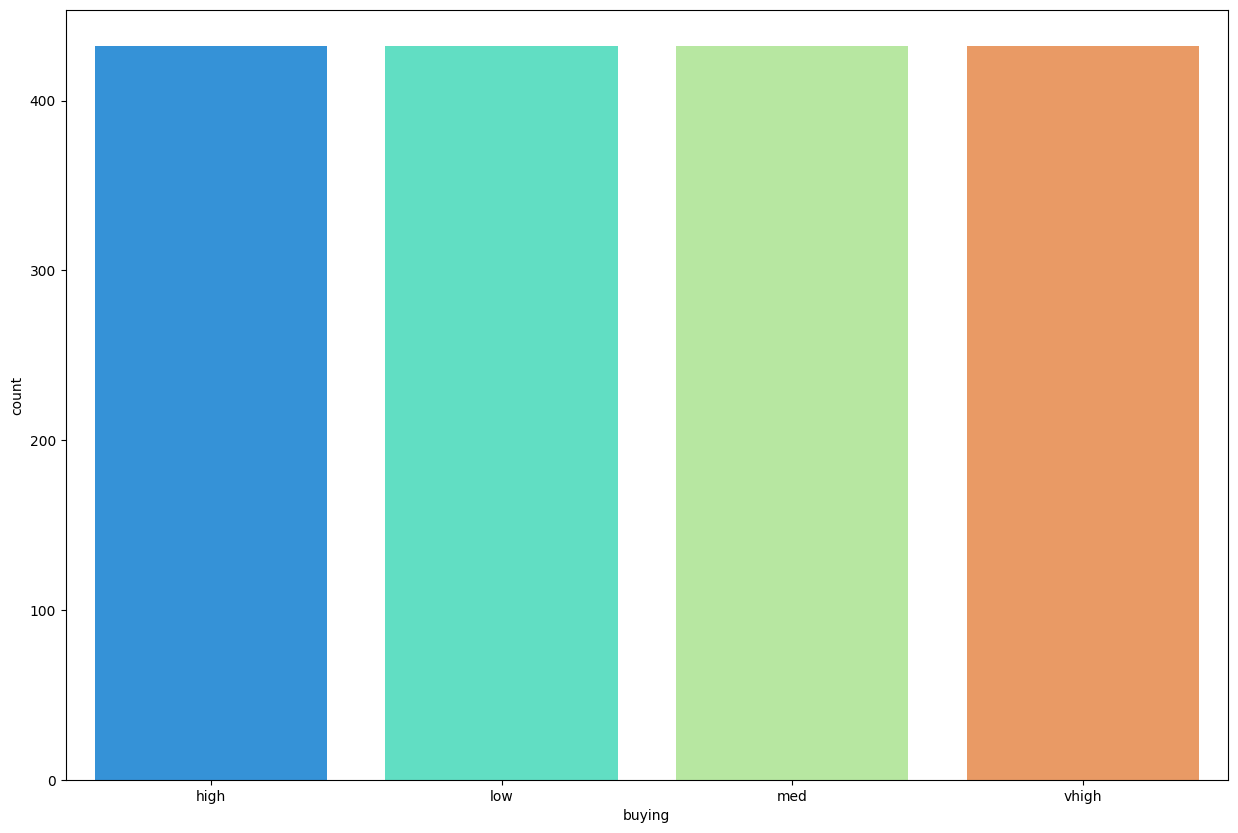

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='buying',palette='rainbow')

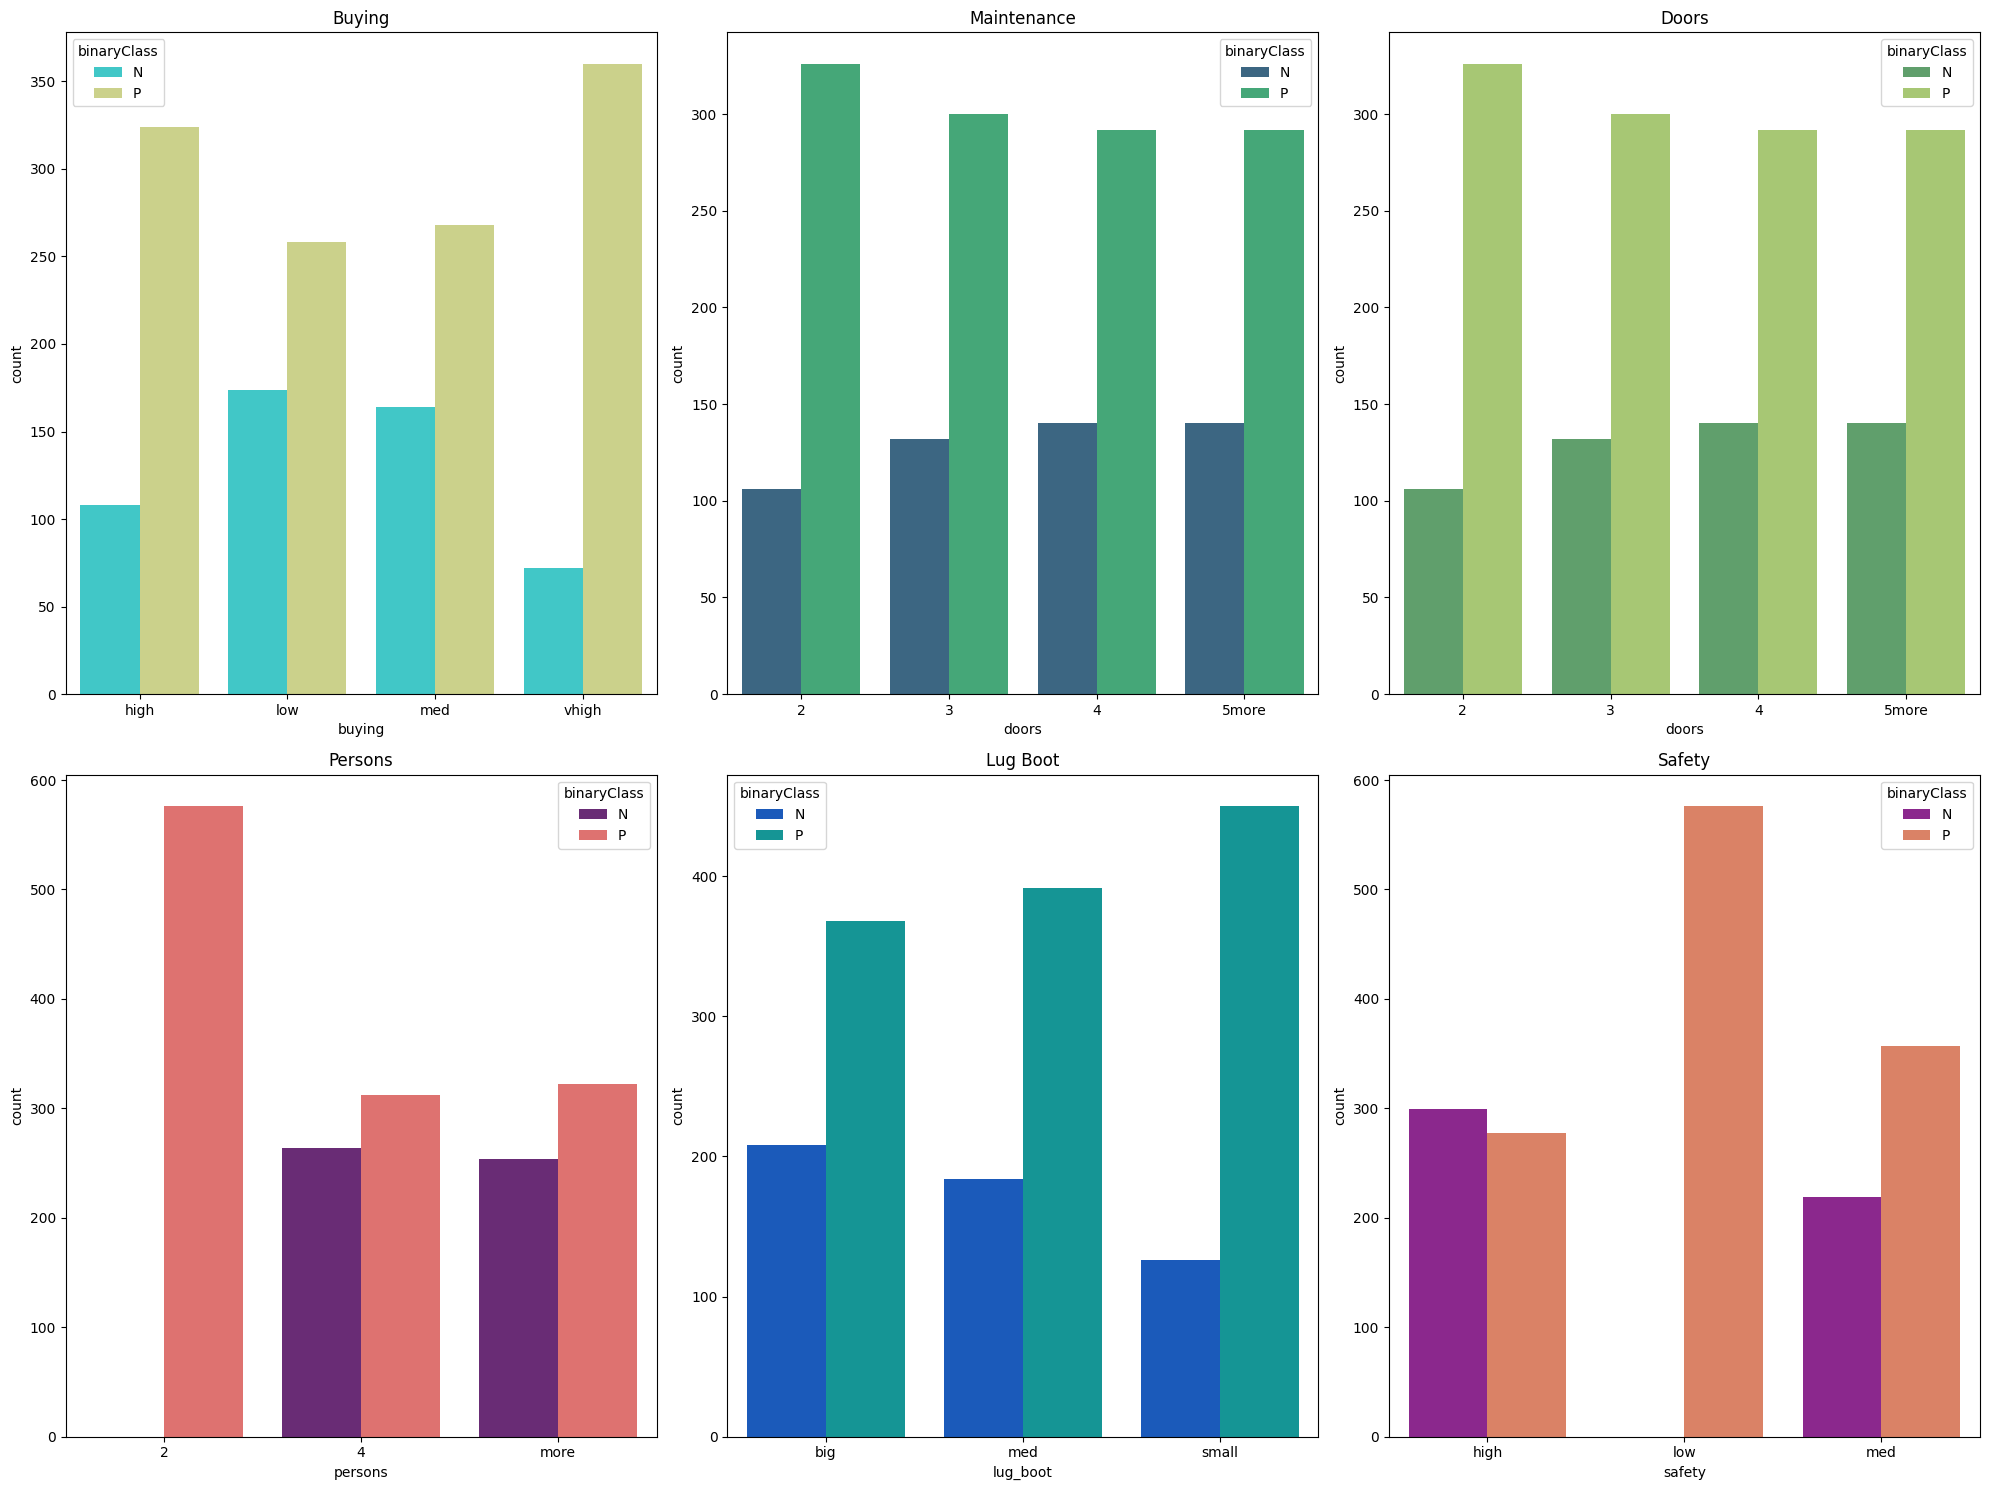

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
sns.countplot(ax=axes[0,0], data=df, x='buying', hue='binaryClass', palette='rainbow')
axes[0,0].set_title('Buying')
sns.countplot(ax=axes[0,1], data=df, x='doors', hue='binaryClass', palette='viridis')
axes[0,1].set_title('Maintenance')
sns.countplot(ax=axes[0,2], data=df, x='doors', hue='binaryClass', palette='summer')
axes[0,2].set_title('Doors')
sns.countplot(ax=axes[1,0], data=df, x='persons', hue='binaryClass', palette='magma')
axes[1,0].set_title('Persons')
sns.countplot(ax=axes[1,1], data=df, x='lug_boot', hue='binaryClass', palette='winter')
axes[1,1].set_title('Lug Boot')
sns.countplot(ax=axes[1,2], data=df, x='safety', hue='binaryClass', palette='plasma')
axes[1,2].set_title('Safety')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   buying       1728 non-null   category
 1   maint        1728 non-null   category
 2   doors        1728 non-null   category
 3   persons      1728 non-null   category
 4   lug_boot     1728 non-null   category
 5   safety       1728 non-null   category
 6   binaryClass  1728 non-null   category
dtypes: category(7)
memory usage: 13.0 KB


In [21]:
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [22]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,3,3,0,0,2,1,1
1,3,3,0,0,2,2,1
2,3,3,0,0,2,0,1
3,3,3,0,0,1,1,1
4,3,3,0,0,1,2,1


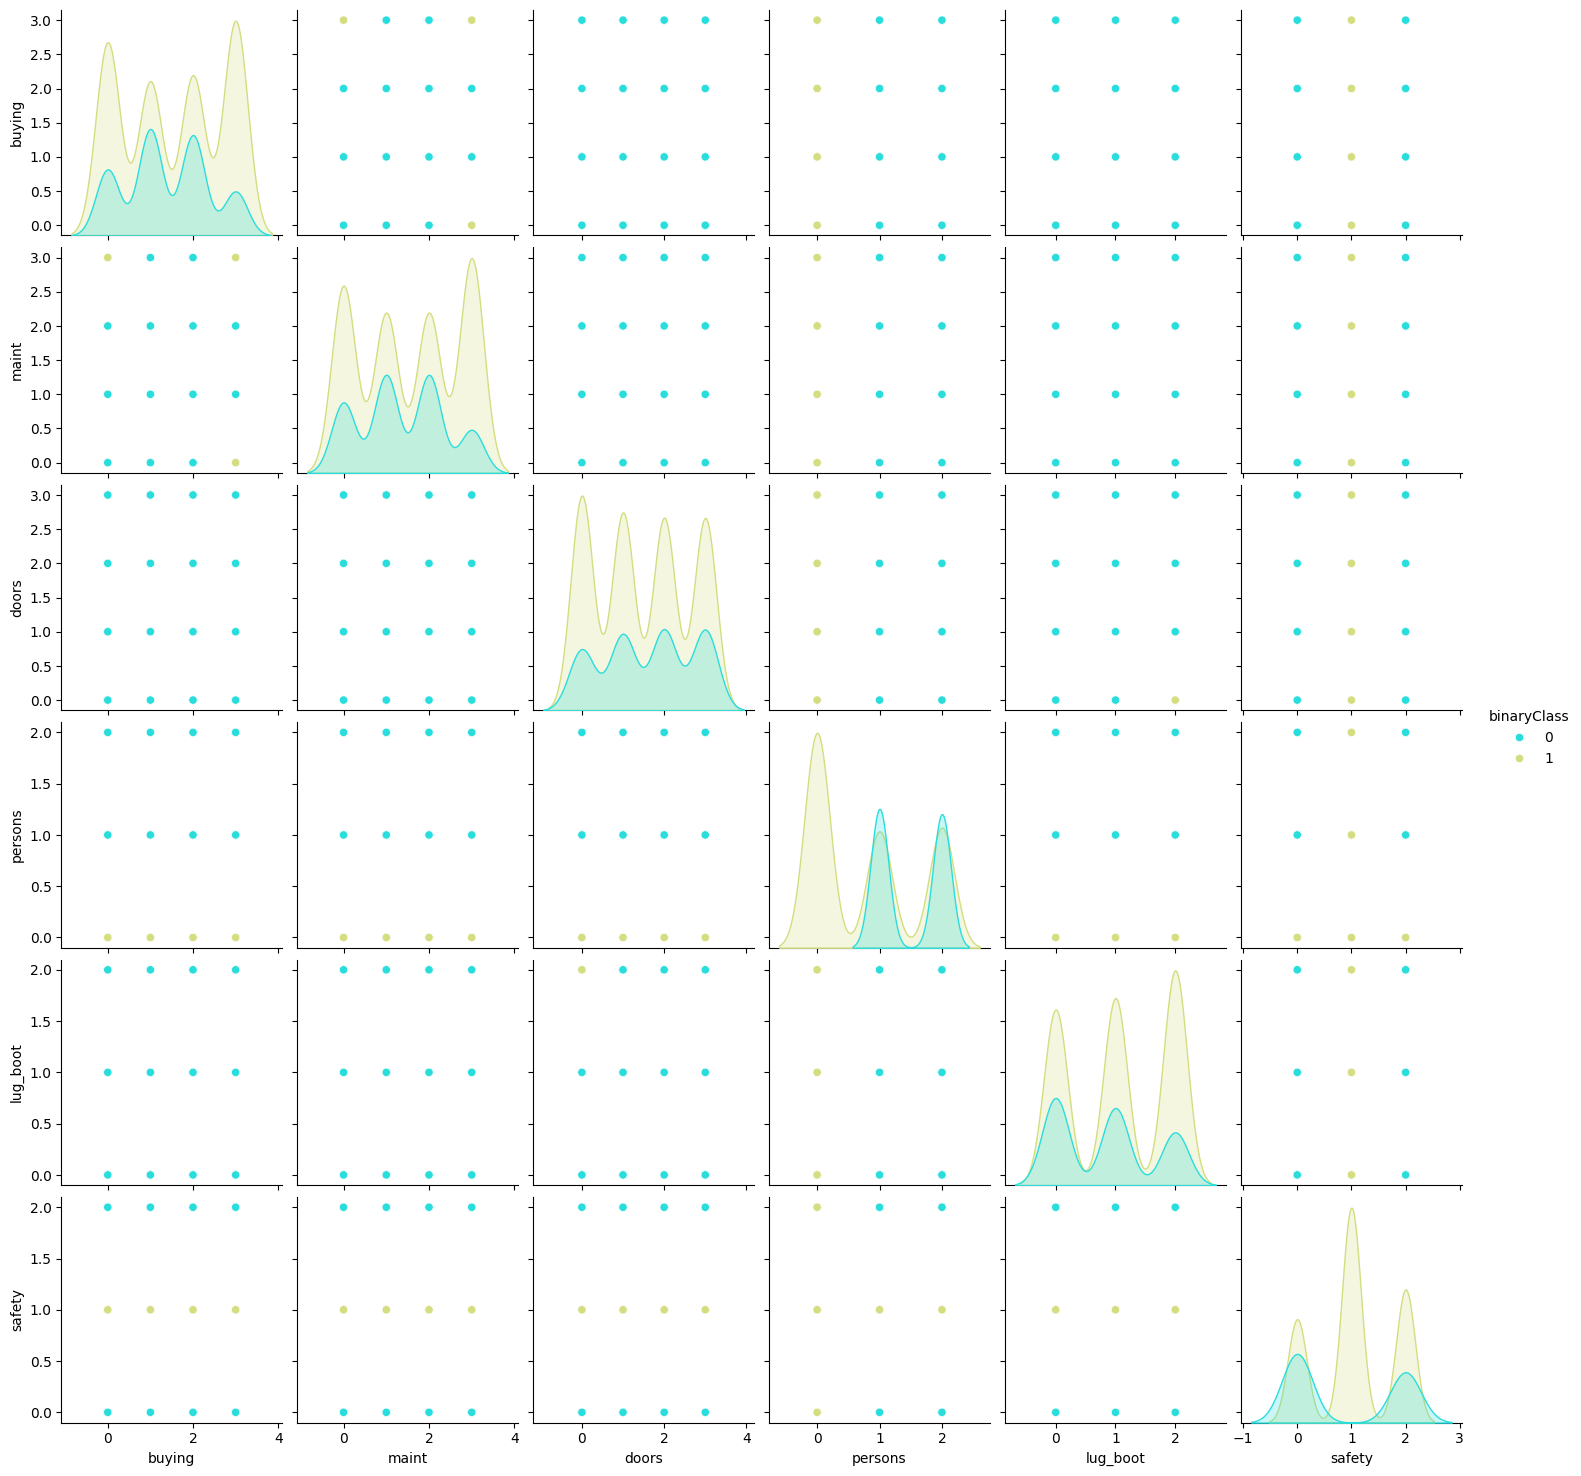

In [23]:
sns.pairplot(df, hue='binaryClass', palette='rainbow')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = df.drop(labels = ['binaryClass'], axis = 1)
y = df['binaryClass']

In [27]:
x.shape

(1728, 6)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [31]:
print(x_train.shape, x_test.shape)

(1209, 6) (519, 6)


In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [38]:
dt = DecisionTreeClassifier(criterion = 'gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [46]:
class_names =df['binaryClass'].astype(str).values.tolist()

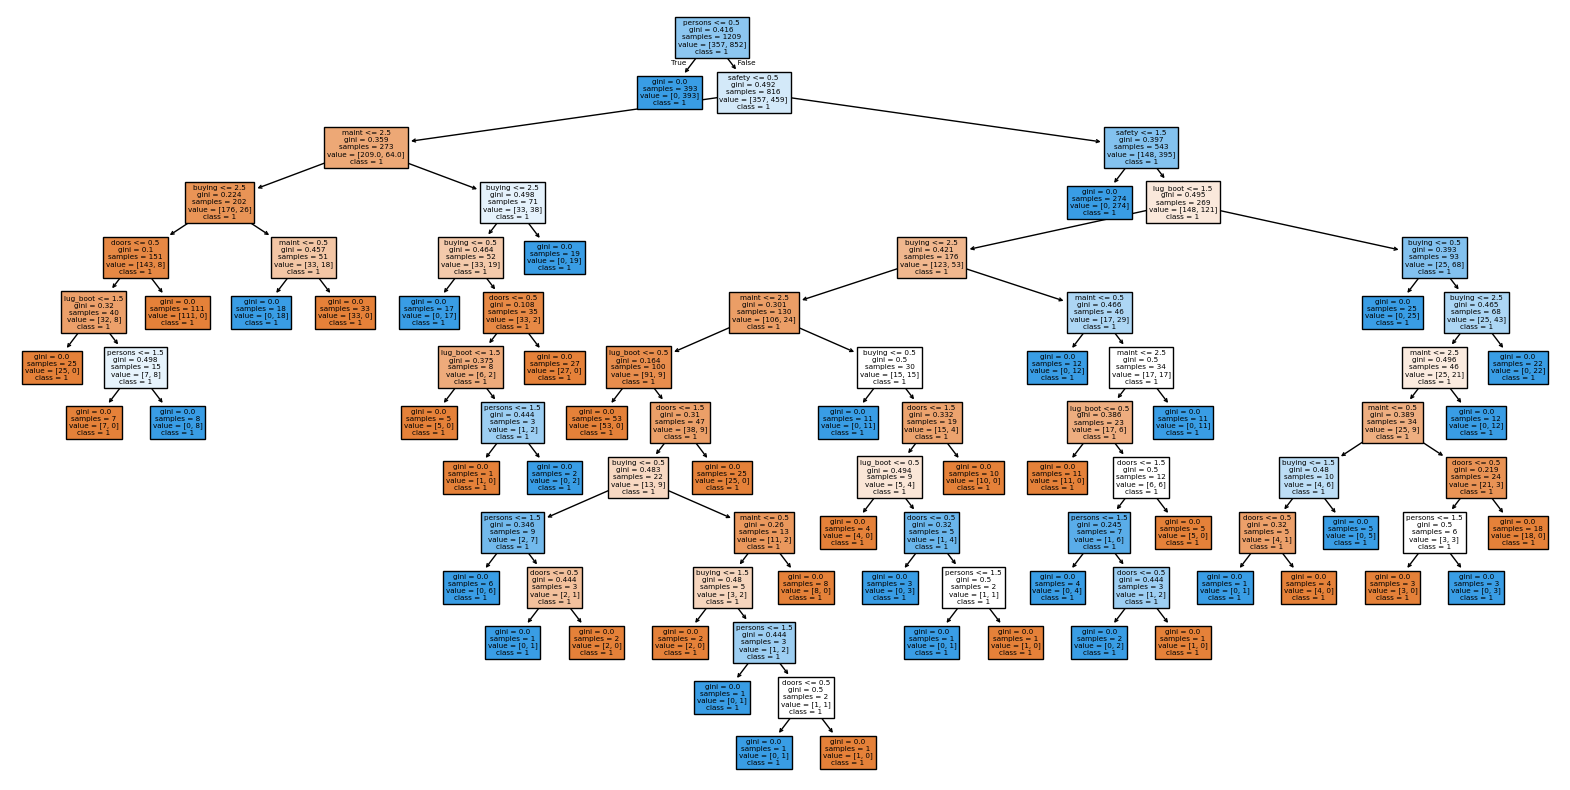

In [47]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=car_data.feature_names, class_names=class_names)
plt.show()

In [48]:
y_train_predicted = dt.predict(x_train)
y_test_predicted = dt.predict(x_test)

In [49]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [50]:
print("Training accuracy = ", accuracy_score(y_train, y_train_predicted))
print("Testing accuracy = ", accuracy_score(y_test, y_test_predicted))

Training accuracy =  1.0
Testing accuracy =  0.9942196531791907


In [52]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       161
           1       1.00      0.99      1.00       358

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



In [53]:
cm = confusion_matrix(y_test, y_test_predicted)
cm

array([[160,   1],
       [  2, 356]])

In [54]:
from sklearn.model_selection import GridSearchCV

In [56]:
params_grid = {'max_leaf_nodes': list(range(0,6)),'min_samples_split': [0,1,2,3,4], 'min_samples_leaf': [0,1,2,3,4], 'max_depth': [0,1,2,3,4,5], 'max_features': [0,1,2,3,4,5],
               'max_leaf_nodes': [0,1,2,3,4,5]}

In [57]:
gd = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)
gd.fit(x_train, y_train)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
12600 fits failed out of a total of 16200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2700 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [58]:
gd.best_params_

{'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [59]:
best_dt = gd.best_estimator_

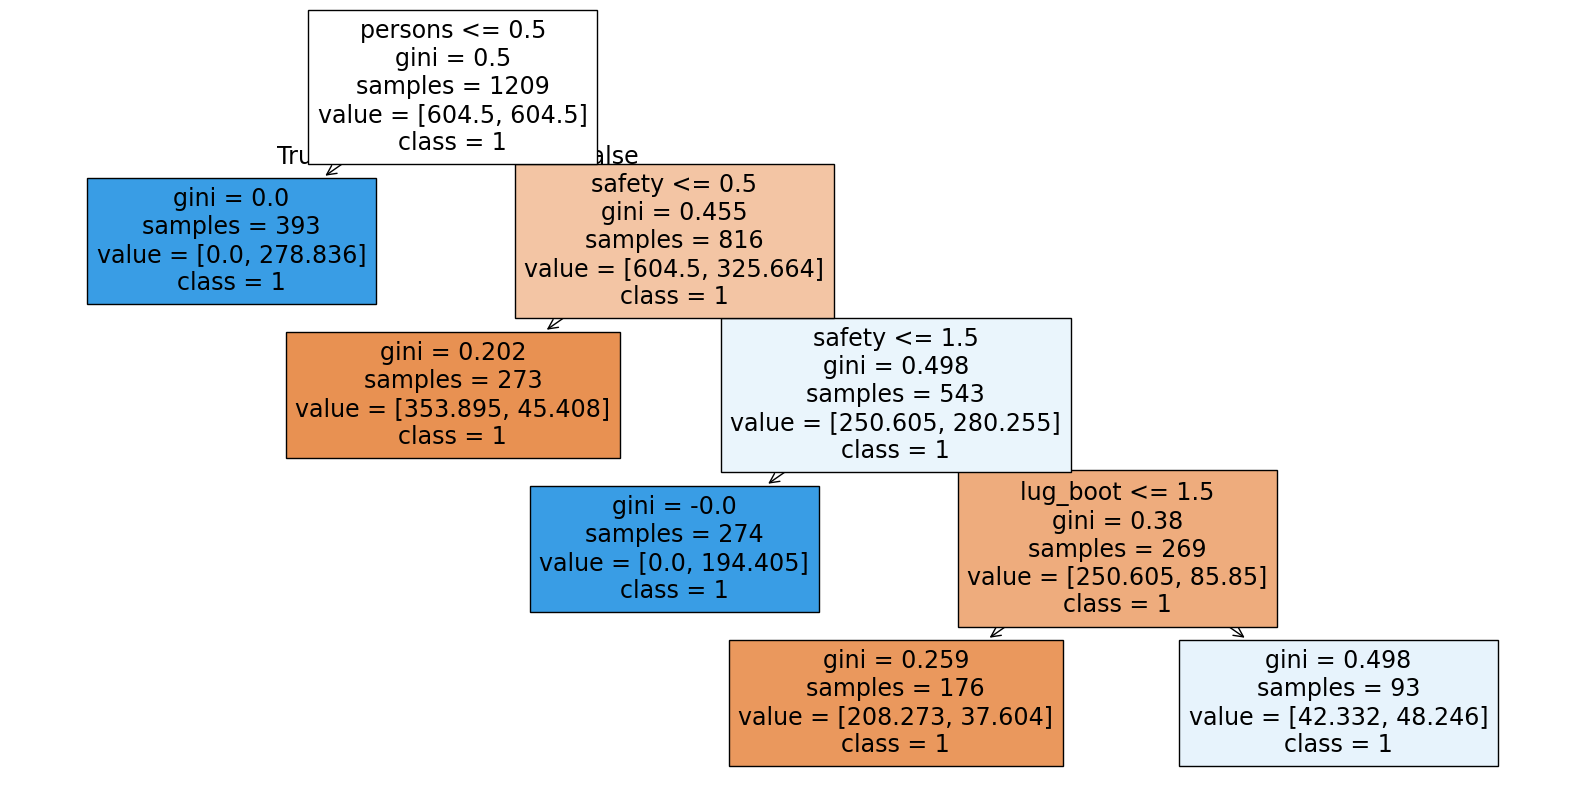

In [60]:
plt.figure(figsize=(20,10))
plot_tree(best_dt, filled=True, feature_names=car_data.feature_names, class_names=class_names)
plt.show()